In [0]:
# Code to check for server GPU ram

!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.9 GB  | Proc size: 120.6 MB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB


In [0]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import Conv2D
from keras.constraints import MaxNorm
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.constraints import MaxNorm

Using TensorFlow backend.


### 1.2 Importing the cifar10 dataset

In [0]:

# loading the dataset

(X_train,y_train), (X_test,y_test) = cifar10.load_data()

print('Size of training features :',X_train.shape)
print('Size of test features :', y_test.shape)
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_test', X_test.shape[0])

170500096/170498071 [==============================] - 27s 0us/step
Size of training features : (50000, 32, 32, 3)
Size of test features : (10000, 1)
Number of images in X_train 50000
Number of images in X_test 10000


In [0]:
# Setting a random seed

seed = 7
np.random.seed(seed)

### 1.3 Displaying few of the images in the dataset by creating a loop

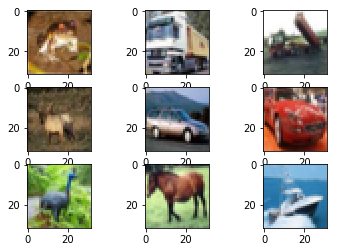

In [0]:
# Displaying few images

# creating a loop to display images

for i in range(0,9):
  plt.subplot(330 + 1+ i)
  plt.imshow(X_train[i]);
  


### 2.1  Data Preprcessing

In [0]:
# a) Before normalizing the data we check if the shape of the data can be fitted into the Keras api

print('Shape of training data :',X_train.shape)
print('Shape of test data :', y_test.shape)

Shape of training data : (50000, 32, 32, 3)
Shape of test data : (10000, 1)


**By checking the shape of the training data , we can see that its feasible to be worked with the keras api and thus no reshape operation is required**

In [0]:
# Normalizing the data

X_train  = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

In [0]:
# One hot encoding the class labels using keras np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

### 2.2. Creating the Convolution Network

**Baseline network structure can be summarized as follows:**

1. Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function and a weight constraint of max norm set to 3.
2. Dropout set to 20%.
3. Convolutional layer, 32 feature maps with a size of 3×3, a rectifier activation function and a weight constraint of max norm set to 3.
4. Max Pool layer with size 2×2.
5. Flatten layer.
6. Fully connected layer with 512 units and a rectifier activation function.
7.Dropout set to 50%.
8.Fully connected output layer with 10 units and a softmax activation function


**We will be using a logarithmic loss function with the stochastic gradient descent optimization algorithm configured with a large momentum and weight decay start with a learning rate of 0.01.**

In [0]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu',kernel_constraint = MaxNorm(3)))
model.add(Dropout(rate = 0.2))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', kernel_constraint= MaxNorm(3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 512, activation = 'relu', kernel_constraint = MaxNorm(3)))
model.add(Dropout(rate = 0.2))
model.add(Dense(units = 10, activation = 'softmax'))

# We will be using SGD as the optimiser

epochs = 25
lrate = 0.01
decay = lrate/epochs

sgd = SGD(lr = lrate, momentum = 0.9, decay = decay)

# compiling the model
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the model
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=epochs, batch_size = 32)


Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 12s 230us/step - loss: 1.6298 - acc: 0.4117 - val_loss: 1.3280 - val_acc: 0.5191
Epoch 2/25
50000/50000 [==============================] - 10s 199us/step - loss: 1.2283 - acc: 0.5644 - val_loss: 1.1418 - val_acc: 0.5901
Epoch 3/25
50000/50000 [==============================] - 10s 199us/step - loss: 1.0450 - acc: 0.6311 - val_loss: 1.0648 - val_acc: 0.6271
Epoch 4/25
50000/50000 [==============================] - 10s 198us/step - loss: 0.8991 - acc: 0.6817 - val_loss: 1.0333 - val_acc: 0.6399
Epoch 5/25
50000/50000 [==============================] - 10s 199us/step - loss: 0.7736 - acc: 0.7282 - val_loss: 1.0001 - val_acc: 0.6589
Epoch 6/25
50000/50000 [==============================] - 11s 221us/step - loss: 0.6638 - acc: 0.7670 - val_loss: 1.0271 - val_acc: 0.6584
Epoch 7/25
50000/50000 [==============================] - 10s 200us/step - loss: 0.5629 - acc: 0.8032 - val_loss: 1.

### 2.3 Model Evaluation

#### 2.3.1Training history visualization

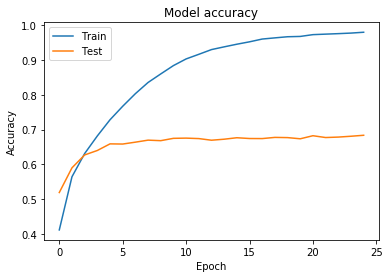

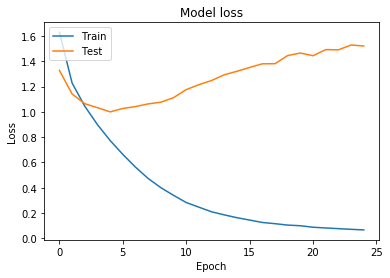

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test,y_test)
print('CNN error rate :', 100 - scores[1]*100)

10000/10000 [==============================] - 1s 68us/step
CNN error rate : 31.64


**Thus we can see that the model is not that good**


### 3.1 Improving the model with a deeper network topology

**Baseline network structure can be summarized as follows:**



1.   Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
2.   Dropout layer at 20%.
3.   Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
4.   Max Pool layer with size 2×2.
5.   Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
6.   Dropout layer at 20%.
7.   Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
8.   Max Pool layer with size 2×2.
9.   Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.
10. Dropout layer at 20%.
11. Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function.
12. Max Pool layer with size 2×2.
13. Flatten layer.
14. Dropout layer at 20%.
15. Fully connected layer with 1024 units and a rectifier activation function.
16. Dropout layer at 20%.
17. Fully connected layer with 512 units and a rectifier activation function.
18. Dropout layer at 20%.
19. Fully connected output layer with 10 units and a softmax activation function.



In [0]:
# padding = Padding: Padding is generally used to add columns and rows of zeroes to keep the spatial sizes 
# constant after convolution, doing this might improve performance as it retains the information at the borders.
# Parameters for the padding function in Keras are Same- output size is the same as input size

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding= 'same'))
model.add(Dropout(rate = 0.2))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding= 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding= 'same'))
model.add(Dropout(rate = 0.2))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding= 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding= 'same'))
model.add(Dropout(rate = 0.2))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding= 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(rate = 0.2))

model.add(Dense(units = 1024, activation = 'relu', kernel_constraint = MaxNorm(3)))
model.add(Dropout(rate = 0.2))

model.add(Dense(units = 512, activation = 'relu', kernel_constraint= MaxNorm(3)))
model.add(Dropout(rate = 0.2))

model.add(Dense(units = 10, activation = 'softmax'))

# compiling model

# We will be using as the optimizer

l_rate = 0.01
epoch = 25
decay_rate = l_rate/epoch
sgd = SGD(lr = l_rate, momentum = 0.9, decay = decay_rate)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = epoch)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 12s 239us/step - loss: 1.9594 - acc: 0.2737 - val_loss: 1.6226 - val_acc: 0.4123
Epoch 2/25
50000/50000 [==============================] - 11s 223us/step - loss: 1.5173 - acc: 0.4442 - val_loss: 1.4494 - val_acc: 0.4870
Epoch 3/25
50000/50000 [==============================] - 11s 224us/step - loss: 1.3120 - acc: 0.5237 - val_loss: 1.2005 - val_acc: 0.5709
Epoch 4/25
50000/50000 [==============================] - 12s 237us/step - loss: 1.1547 - acc: 0.5856 - val_loss: 1.0935 - val_acc: 0.6070
Epoch 5/25
50000/50000 [==============================] - 11s 225us/step - loss: 1.0403 - acc: 0.6301 - val_loss: 0.9489 - val_acc: 0.6621
Epoch 6/25
50000/50000 [==============================] - 11s 223us/step - loss: 0.9464 - acc: 0.6647 - val_loss: 0.8943 - val_acc: 0.6798
Epoch 7/25
50000/50000 [==============================] - 11s 229us/step - loss: 0.8804 - acc: 0.6868 - val_loss: 0.

### 3.2 Revauluation of the deeper network topology CNN model

[link text](https://keras.io/visualization/)

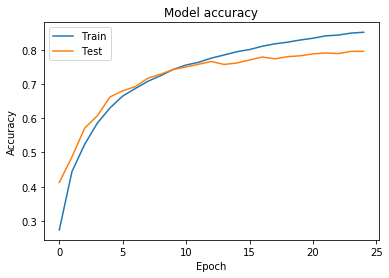

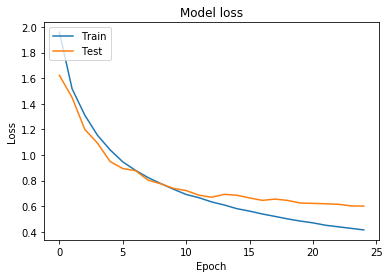

In [0]:
# training history visualization: https://keras.io/visualization/


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
print(model.summary())

scores = model.evaluate(X_test,y_test)
print('CNN error rate :', 100 - scores[1]*100)
print('CNN model accuracy :', scores[1]*100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_34 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_35 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 16, 16, 64)        36928     
__________

### 4.1  Increasing the model performance using Test-Time Augmentation

**1. First, we define a function named load_dataset() that will load the CIFAR-10 dataset and prepare it for modeling.**

In [0]:
from keras.datasets.cifar10 import load_data
from keras.utils import np_utils
from keras.layers import BatchNormalization

# load and return the cifar10 dataset ready for modeling
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = load_data()
	# normalize pixel values
	trainX = trainX.astype('float32') / 255
	testX = testX.astype('float32') / 255
	# one hot encode target values
	trainY = np_utils.to_categorical(trainY)
	testY = np_utils.to_categorical(testY)
	return trainX, trainY, testX, testY

**2. Next, we define a function named define_model() that will define a model for the CIFAR-10 dataset, ready to be fit and then evaluated**

In [0]:
# define the cnn model for the cifar10 dataset
def define_model():
	# define model
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dense(10, activation='softmax'))
	# compile model
	model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	return model

**3. Next, an evaluate_model() function is defined that will fit the defined model on the training dataset and then evaluate it on the test dataset, returning the estimated classification accuracy for the run.**

In [0]:
# fit and evaluate a defined model
def evaluate_model(model, trainX, trainY, testX, testY):
	# fit model
	model.fit(trainX, trainY, epochs=3, batch_size=128, verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	return acc

**4. Next, we can define a function with new behavior to repeatedly define, fit, and evaluate a new model and return the distribution of accuracy scores.**

**The repeated_evaluation() function below implements this, taking the dataset and using a default of 10 repeated evaluations.**

In [0]:
# repeatedly evaluate model, return distribution of scores
def repeated_evaluation(trainX, trainY, testX, testY, repeats=10):
	scores = list()
	for _ in range(repeats):
		# define model
		model = define_model()
		# fit and evaluate model
		accuracy = evaluate_model(model, trainX, trainY, testX, testY)
		# store score
		scores.append(accuracy)
		print('> %.3f' % accuracy)
	return scores

**5. Finally, we can call the load_dataset() function to prepare the dataset, then repeated_evaluation() to get a distribution of accuracy scores that can be summarized by reporting the mean and standard deviation.**

In [0]:
# load dataset
trainX, trainY, testX, testY = load_dataset()
# evaluate model
scores = repeated_evaluation(trainX, trainY, testX, testY)
# summarize result
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.668 (0.033)


**Observation: Test time augmentation has not improved the model performance**

**In Keras, We have a ImageDataGenerator class that is used to generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches) indefinitely. The image data is generated by transforming the actual training images by rotation, crop, shifts, shear, zoom, flip, reflection, normalization etc. bold text**

### 5.1Improving CNN with Image augmentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator

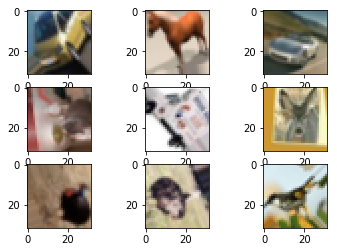

In [0]:
# creating the image generator
datagen = ImageDataGenerator(rotation_range=90, 
                             width_shift_range=0.1, 
                             height_shift_range=0.1, 
                             horizontal_flip=True)
datagen.fit(X_train)

# Creating batches of images 

for X_batch,y_batch in datagen.flow(X_train, y_train, batch_size = 9):
    for i in range(0,9):
        plt.subplot(331 + i)
        plt.imshow(X_batch[i])
    plt.show()
    break

In [0]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np
 
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate
 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
 
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)
 
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
 
model.summary()
 
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)
 
#training
batch_size = 64
 
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=125,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])
#save to disk
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5') 
 
#testing
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0])

In [0]:
# Creating the CNN

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding= 'same'))
model.add(Dropout(rate = 0.2))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding= 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding= 'same'))
model.add(Dropout(rate = 0.2))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding= 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding= 'same'))
model.add(Dropout(rate = 0.2))
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding= 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(rate = 0.2))
model.add(Dense(units = 1024, activation = 'relu', kernel_constraint = MaxNorm(3)))
model.add(Dropout(rate = 0.2))
model.add(Dense(units = 512, activation = 'relu', kernel_constraint= MaxNorm(3)))
model.add(Dropout(rate = 0.2))
model.add(Dense(units = 10, activation = 'softmax'))

# compiling model

# We will be using as the optimizer

l_rate = 0.01
epoch = 25
decay_rate = l_rate/epoch
sgd = SGD(lr = l_rate, momentum = 0.9, decay = decay_rate)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the model

model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = epoch)
model.summary()

#data augmentation
datagen = ImageDataGenerator(rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True)
datagen.fit(X_train)

#training
batch_size = 64
 
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=X_train.shape[0] // batch_size,epochs=20,\
                    verbose=1,validation_data=(X_test,y_test))


# steps_per_epoch = (num_samples / batch_size)

# How to use image generator with CNN: https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 12s 232us/step - loss: 1.9179 - acc: 0.2931 - val_loss: 1.6581 - val_acc: 0.4119
Epoch 2/25
50000/50000 [==============================] - 10s 196us/step - loss: 1.5119 - acc: 0.4475 - val_loss: 1.3636 - val_acc: 0.4987
Epoch 3/25
50000/50000 [==============================] - 10s 196us/step - loss: 1.3287 - acc: 0.5201 - val_loss: 1.2272 - val_acc: 0.5584
Epoch 4/25
50000/50000 [==============================] - 10s 195us/step - loss: 1.2051 - acc: 0.5656 - val_loss: 1.1391 - val_acc: 0.5925
Epoch 5/25
50000/50000 [==============================] - 10s 195us/step - loss: 1.1059 - acc: 0.6036 - val_loss: 1.0518 - val_acc: 0.6264
Epoch 6/25
50000/50000 [==============================] - 10s 205us/step - loss: 1.0197 - acc: 0.6358 - val_loss: 0.9709 - val_acc: 0.6583
Epoch 7/25
50000/50000 [==============================] - 10s 195us/step - loss: 0.9562 - acc: 0.6592 - val_loss: 0.


### 5.2 Model Evaluation of Image Augmented CNN model with deeper topology

In [0]:
print(model.summary())

scores = model.evaluate(X_test,y_test)
print('CNN error rate :', 100 - scores[1]*100)
print('CNN model accuracy :', scores[1]*100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_22 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_23 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 64)        36928     
__________